# Set-Up

In [1]:
import os, collections
import numpy as np
import seaborn as sns
import networkx as nx
import pandas as pd
from scipy import spatial

from utils.embeddings import *
from utils.mcmc import *
from utils.spectral import *
from utils.create_graphs import *

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

load the graphs

In [2]:
graph_type = 'small_world'

In [3]:
## create the training data
Graphs_train = [] 
Graphs_test = [] 
Ngraphs = 10
Nnodes = 1000
for i in range(Ngraphs):
    Graphs_train.append(nx.newman_watts_strogatz_graph(n=Nnodes, k=2, p=0.2))
    Graphs_test.append(nx.newman_watts_strogatz_graph(n=Nnodes, k=2, p=0.2))

In [4]:
## load the train graphs
Graphs_train = []
path = 'graphs/data/' + graph_type + '/train'
fnames = os.listdir(path)
fnames = [f for f in fnames if f.endswith('.gz')]
for i in range(len(fnames)):
    Graphs_train.append(nx.read_edgelist(path + '/' + fnames[i]))

## load the test graphs
Graphs_test = []
path = 'graphs/data/' + graph_type + '/test'
fnames = os.listdir(path)
fnames = [f for f in fnames if f.endswith('.gz')]
for i in range(len(fnames)):
    Graphs_test.append(nx.read_edgelist(path + '/' + fnames[i]))

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/data/small_world/train'

In [5]:
## load the Neural ERGM simulated graphs
Graphs_nergm = []
path = 'graphs/generated/' + graph_type + '/'
fnames = os.listdir(path)
fnames = [f for f in fnames if f.endswith('.gz')]
for i in range(len(fnames)):
    Graphs_nergm.append(nx.read_edgelist(path + '/' + fnames[i]))

Also generate a set of "null" graphs corresponding to ER graphs

In [6]:
Graphs_null = []
for i in range(len(Graphs_test)):
    Graphs_null.append(nx.erdos_renyi_graph(Graphs_test[i].number_of_nodes(), nx.density(Graphs_test[i])))

Compare the spectra of the Laplacian for isolated examples

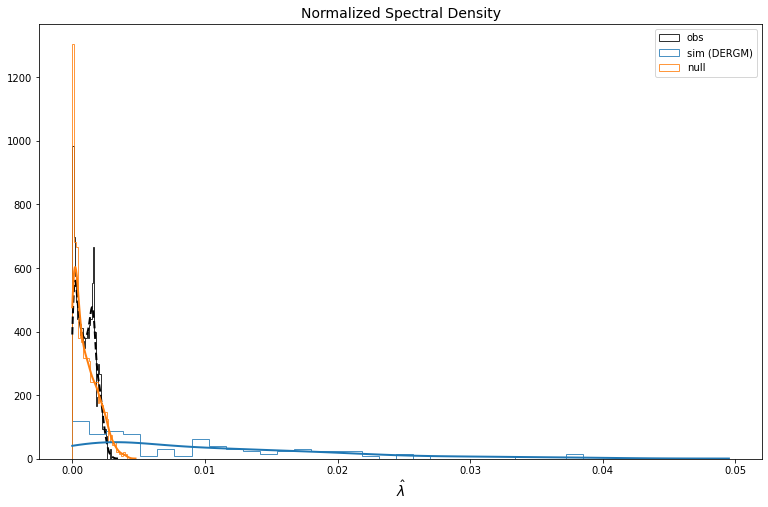

In [7]:
## compare the eigenvalue distribution for a single one of: (observed, simulated, null) graphs
nbins = 30
alpha = 0.8
golden_ratio = 1.61803398875

plt.figure(figsize=(golden_ratio*8,8))
#ax = sns.barplot(x="Word", y="Frequency", data=boxdata)

sns.distplot(Laplacian_eigs(Graphs_test[0]), 
             hist_kws={"alpha":alpha, "histtype":u'step'}, 
             bins=nbins, 
             label='obs', 
             kde_kws={'clip': (0.0, 1.0), "linewidth":2, "linestyle":"dashed"}, color='k')
sns.distplot(Laplacian_eigs(Graphs_nergm[0]), 
             hist_kws={"alpha":alpha, "histtype":u'step'}, 
             bins=nbins, 
             label='sim (DERGM)', 
             kde_kws={'clip': (0.0, 1.0), "linewidth":2})
sns.distplot(Laplacian_eigs(Graphs_null[0]), 
             hist_kws={"alpha":alpha, "histtype":u'step'}, 
             bins=nbins, 
             label='null', 
             kde_kws={'clip': (0.0, 1.0), "linewidth":2})

plt.title('Normalized Spectral Density', fontsize=14)
plt.legend()
plt.xlabel(r'$\hat{\lambda}$', fontsize=14)
plt.show()

## MMD

### degree distribution

In [ ]:
from utils.MMD import *

def degrees(Graph):
    degs = list(Graph.degree)
    return np.sort(np.asarray([degs[i][1] for i in range(len(degs))]))

In [ ]:
x_test = [degrees(Graphs_test[i]) for i in range(len(Graphs_test))]
x_nergm = [degrees(Graphs_nergm[i]) for i in range(len(Graphs_nergm))]
x_null = [degrees(Graphs_null[i]) for i in range(len(Graphs_null))]

In [ ]:
compute_mmd(x_test, x_nergm, gaussian_emd)

In [ ]:
compute_mmd(x_test, x_null, gaussian_emd)

In [ ]:
compute_mmd(x_nergm, x_null, gaussian_emd)

### clustering coefficient distribution

In [ ]:
x_test = [list(nx.clustering(Graphs_test[i]).values()) for i in range(len(Graphs_test))]
x_nergm = [list(nx.clustering(Graphs_nergm[i]).values()) for i in range(len(Graphs_nergm))]
x_null = [list(nx.clustering(Graphs_null[i]).values()) for i in range(len(Graphs_null))]

In [ ]:
compute_mmd(x_test, x_nergm, gaussian_emd)

In [ ]:
compute_mmd(x_test, x_null, gaussian_emd)

In [ ]:
compute_mmd(x_nergm, x_null, gaussian_emd)

### orbit distribution

???

### MMD for eigenvalue distribution of Laplacian

In [ ]:
eigs_nergm = Laplacian_eigs_set(Graphs_nergm)
max_eig_nerg = max([max(eigs_nergm[i]) for i in range(len(eigs_nergm))])

eigs_test = Laplacian_eigs_set(Graphs_test)
max_eig_test = max([max(eigs_test[i]) for i in range(len(eigs_test))])

max_eig = max(max_eig_nerg, max_eig_test)
max_eig

In [ ]:
bins = np.linspace(0, max_eig, 5)
dist = np.zeros((len(bins), len(bins)))
for i in range(len(bins)):
    for j in range(len(bins)):
        dist[i,j] = np.sqrt((bins[i] - bins[j])**2)

In [ ]:
dist

In [ ]:
d_mat = toeplitz(range(5)).astype(np.float)
distance_scaling = 4/max_eig
distance_mat = d_mat / distance_scaling
distance_mat

In [ ]:
nbins = 40
bins = np.linspace(0, max_eig, nbins)
distance_scaling = (nbins-1)/max_eig

In [ ]:
hist_nergm = []
for i in range(len(Graphs_nergm)):
    hist_tmp, _ = np.histogram(Laplacian_eigs(Graphs_nergm[i]), bins=bins)
    hist_nergm.append(hist_tmp)
    
hist_test = []
for i in range(len(Graphs_test)):
    hist_tmp, _ = np.histogram(Laplacian_eigs(Graphs_test[i]), bins=bins)
    hist_test.append(hist_tmp)
    
hist_null = []
for i in range(len(Graphs_null)):
    hist_tmp, _ = np.histogram(Laplacian_eigs(Graphs_null[i]), bins=bins)
    hist_null.append(hist_tmp)

In [ ]:
compute_mmd(hist_nergm, hist_test, gaussian_emd, distance_scaling=distance_scaling)

In [ ]:
compute_mmd(hist_null, hist_test, gaussian_emd, distance_scaling=distance_scaling)

# SGOF

Use the method of [Shore, Lubin (2015)](https://arxiv.org/abs/1407.7247). This compares graphs simulated from the model (whatever model it is, ERGM, GraphRNN, etc) to the observed graph and graphs drawn from a "null hypothesis distribution", which in this case is the ER distribution. In that paper they considered the case where there is a single observed graph and multiple simulated graphs (all with the same number of nodes). To extend this to the case of having multiple observed graphs, I will just compute the spectral GOF separately for each observed graph and then take the average. There may be more sophisticated solutions than this one.